In [1]:
!pip3 install mne

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


# MNE - Learning project

## Goals
1. Reading different data formats
2. Processing 
3. Analysis

## Reading 

### MEG
Data can be imported from various MEG manufacturers 

1. (.fif) -> MEGIN/Elektra Neuromag VectorView and TRIUX
2. (.bin) -> MEG data from the OPM system used by the FIL at UCL
3. (.bin) -> Artemis123
4. 4D Neuroimaging
5. CTF data
6. Polhemus data


### EEG
1. BrainVision
2. European data format (.edf)
3. Neuroscan CNT (.cnt)

In [2]:
import mne 
import numpy as np

In [3]:
# # Neuromag raw fif files

# sample_data_folder = mne.datasets.sample.data_path()
# sample_data_raw_file = (
#     sample_data_folder / "MEG" / "sample" / "sample_audvis_filt-0-40_raw.fif"
# )
# raw = mne.io.read_raw_fif(sample_data_raw_file)

Large sample dataset: 3 GB after extraction

In [4]:
# ### EEG

# # BrainVision
# ssvep_folder = mne.datasets#.ssvep.data_path()
# ssvep_data_raw_path = (
#     ssvep_folder / "sub-02" / "ses-01" / "eeg" / "sub-02_ses-01_task-ssvep_eeg.vhdr"
# )
# ssvep_raw = mne.io.read_raw_brainvision(ssvep_data_raw_path, verbose=False)


Very large datasets (no space on laptop). Taking different approach

1. Using single subject https://datashare.ed.ac.uk/handle/10283/2189



In [5]:
import numpy as np
import matplotlib.pyplot as plt

from mne.datasets.limo import load_data
from mne.stats import linear_regression
from mne.viz import plot_events, plot_compare_evokeds
from mne import combine_evoked


print(__doc__)

# subject to use
subj = 1

Automatically created module for IPython interactive environment


In [6]:
%time limo_epochs = load_data(subject=subj)

CPU times: user 4.18 s, sys: 24.7 s, total: 28.9 s
Wall time: 37.9 s


In [7]:
### Downloading data: Reasonable
### Loading data: VERY Long

In [8]:
limo_epochs

Number of events,1055
Events,Face/A: 524Face/B: 531
Time range,-0.300 – 0.500 s
Baseline,off


In [25]:
# what does negative time in range mean?

In [9]:
type(limo_epochs)

mne.epochs.EpochsArray

In [10]:
len(set(limo_epochs.ch_names))

132

132 channels

In [11]:
limo_epochs.events

array([[   0,    0,    0],
       [   1,    0,    0],
       [   2,    0,    0],
       ...,
       [1052,    0,    1],
       [1053,    0,    1],
       [1054,    0,    1]])

In [12]:
limo_epochs.events.shape


(1055, 3)

In [13]:
limo_epochs.event_id

{'Face/A': 0, 'Face/B': 1}

In [14]:
# The third column is 0 for face A and 1 for face B?
# Is it the choice of the subject or is it actual image shown?

In [15]:
len(limo_epochs[limo_epochs.events[:, -1]==0]) 

524

In [16]:
len(limo_epochs[limo_epochs.events[:, -1]==1])

531

In [17]:
# The third column is 0 for face A and 1 for face B? Yes
# Is it the choice of the subject or is it actual image shown? No idea. Working with an assumption that it is

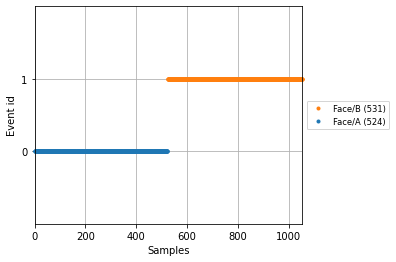

Text(0.5, 0.98, 'Distribution of events in LIMO epochs')

In [18]:
fig = plot_events(limo_epochs.events, event_id=limo_epochs.event_id)
fig.suptitle("Distribution of events in LIMO epochs")

Not setting metadata
1055 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


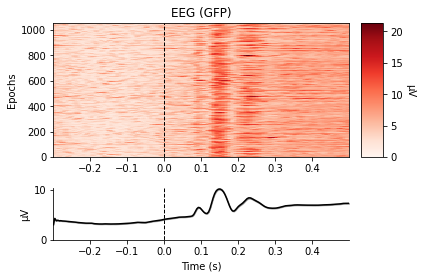

[<Figure size 432x288 with 3 Axes>]

In [19]:
limo_epochs.plot_image()

Not setting metadata
524 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


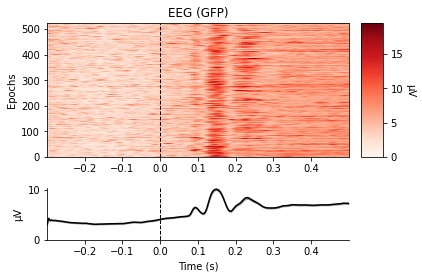

[<Figure size 432x288 with 3 Axes>]

In [20]:
limo_epochs["Face/A"].plot_image()

Not setting metadata
531 matching events found
No baseline correction applied


0 projection items activated
combining channels using "gfp"


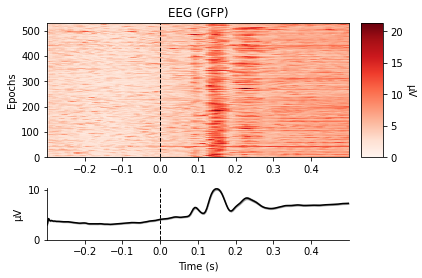

[<Figure size 432x288 with 3 Axes>]

In [21]:
limo_epochs["Face/B"].plot_image()

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


/home/sangeetha/.local/lib/python3.8/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


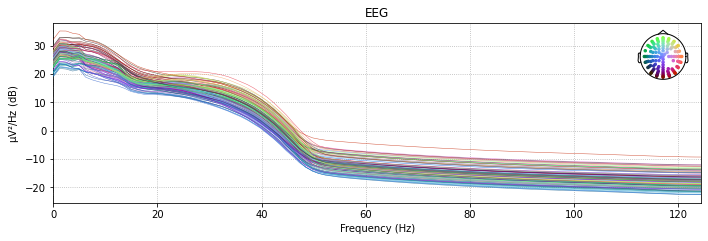

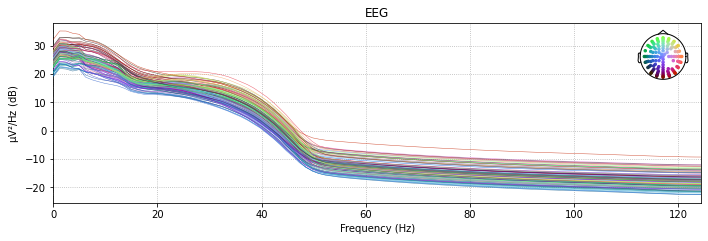

In [22]:
limo_epochs["Face/A"].compute_psd().plot()

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


/home/sangeetha/.local/lib/python3.8/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


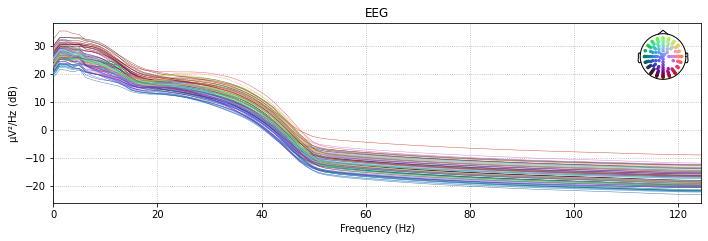

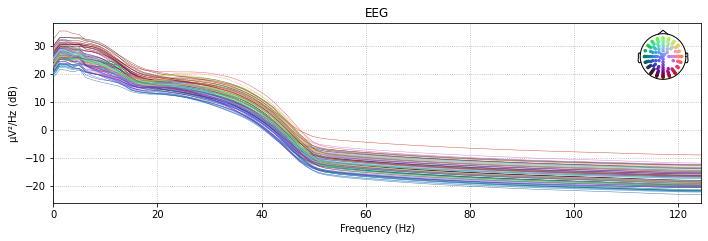

In [23]:
limo_epochs["Face/B"].compute_psd().plot()

Applying baseline correction (mode: mean)
Not setting metadata
1055 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


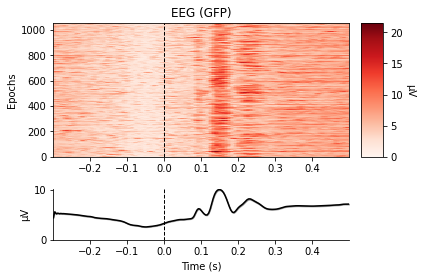

[<Figure size 432x288 with 3 Axes>]

In [27]:
limo_epochs.apply_baseline((-0.1, 0.0)).plot_image()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


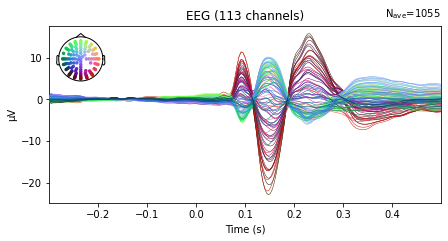

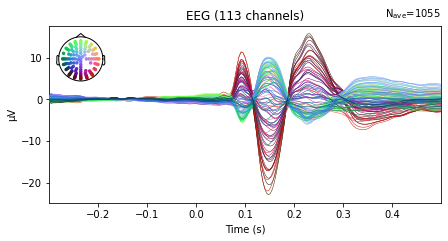

In [26]:
limo_epochs.average().plot()

In [28]:
# what does negative time in range mean?
# From the figure, it seems that most of the signal is a little while after 0.
# The 0 is reference time during experiment. Most likely, it is the time at which the "face" is shown to the subject

In [29]:
limo_epochs.tmin

-0.29994419642857145

In [30]:
limo_epochs.tmax

0.49990699404761907

In [36]:
limo_epochs.equalize_event_counts()

Dropped 7 epochs: 1048, 1049, 1050, 1051, 1052, 1053, 1054


(<EpochsArray |  1048 events (all good), -0.299944 – 0.499907 s, baseline -0.1 – 0 s, ~212.3 MB, data loaded, with metadata,
  'Face/A': 524
  'Face/B': 524>,
 array([1048, 1049, 1050, 1051, 1052, 1053, 1054]))

In [37]:
limo_epochs

Number of events,1048
Events,Face/A: 524Face/B: 524
Time range,-0.300 – 0.500 s
Baseline,-0.100 – 0.000 s


In [38]:
# Make copies!! If not, changes are in place

Using matplotlib as 2D backend.


<ipython-input-39-a92c183d669c>:1: FutureWarning: The current default events=None is deprecated and will change to events=True in MNE 1.6. Set events=False to suppress this warning.
  limo_epochs.plot()


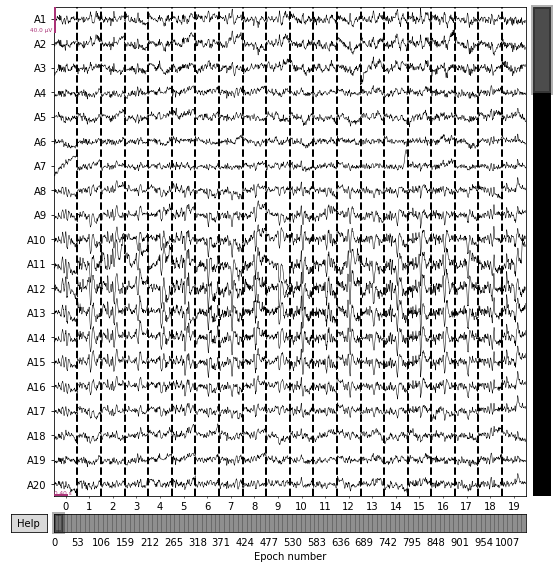

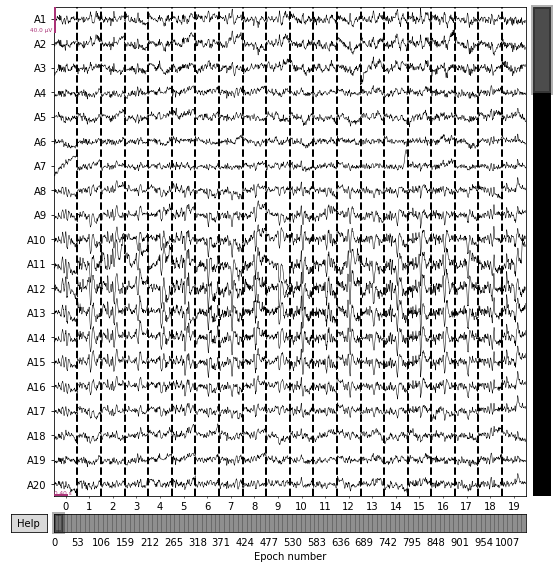

In [39]:
limo_epochs.plot()

In [40]:
limo_epochs.get_data()

array([[[ 1.19310319e-06,  1.80056250e-06,  1.74862707e-06, ...,
          2.94573123e-06,  3.45437295e-06,  3.50601489e-06],
        [ 1.24496077e-06,  1.78491469e-06,  1.76728723e-06, ...,
          5.80842654e-06,  6.27497928e-06,  6.85734956e-06],
        [-6.23136817e-06, -6.66139041e-06, -6.08779417e-06, ...,
          2.61068048e-06,  2.47375764e-06,  2.74860324e-06],
        ...,
        [ 1.75250477e-06,  3.25912590e-06,  1.53965206e-06, ...,
          6.77510757e-06,  9.04033870e-06,  9.61447544e-06],
        [-4.36696940e-06, -4.06142026e-06, -1.85684722e-06, ...,
          2.51373834e-06,  2.97133559e-06,  1.93749780e-06],
        [ 1.06531888e-05,  1.12047024e-05,  1.04747625e-05, ...,
         -4.36297221e-06, -4.22362800e-06, -7.11050410e-06]],

       [[ 2.89122098e-06,  3.11791795e-06,  1.01108139e-06, ...,
         -3.89233056e-07,  5.97826808e-08,  4.71970913e-07],
        [ 1.94389148e-06,  6.86508257e-07, -1.82968954e-06, ...,
          4.90270646e-06,  4.90859493e